RESOUDRE DES PROBLEMES DE REGRESSION

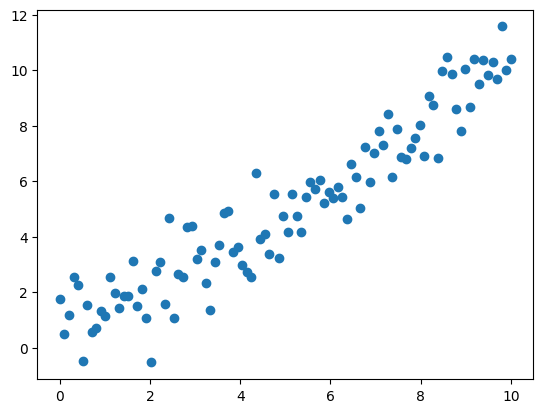

In [93]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np 
np.random.seed(0)
m=100#nombre d'échantillons 
X=np.linspace(0,10,m).reshape(m,1)
y=X+np.random.randn(m,1)
plt.scatter(X,y)

Le code suivant est commun à la majorité des modèles de Sklearn :

In [ ]:
model=LinearRegression()
model.fit(X,y) #entrainement du modèle
model.score(X,y) #évaluation sur les mêmes données (ce qui est à éviter)
#dans ce cas, c'est le coefficient de détermination qui est calculé 
prediction=model.predict(X)

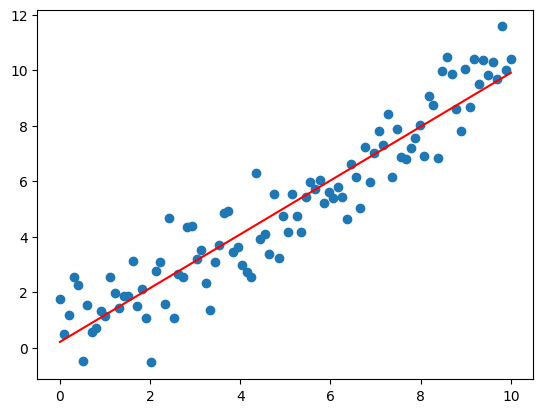

In [95]:
plt.plot(X,prediction,c='r')
plt.scatter(X,y)

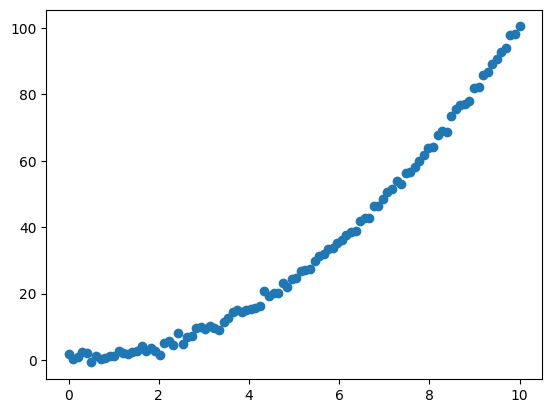

In [96]:
np.random.seed(0)
m=100#nombre d'échantillons 
X=np.linspace(0,10,m).reshape(m,1)
y=X**2+np.random.randn(m,1)
plt.scatter(X,y)

In [97]:
from sklearn.svm import SVR
model=SVR(C=100)
model.fit(X,y) #entrainement du modèle
model.score(X,y) #évaluation sur les mêmes données (ce qui est à éviter)
#dans ce cas, c'est le coefficient de détermination qui est calculé 
prediction=model.predict(X)

C:\Users\qevan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


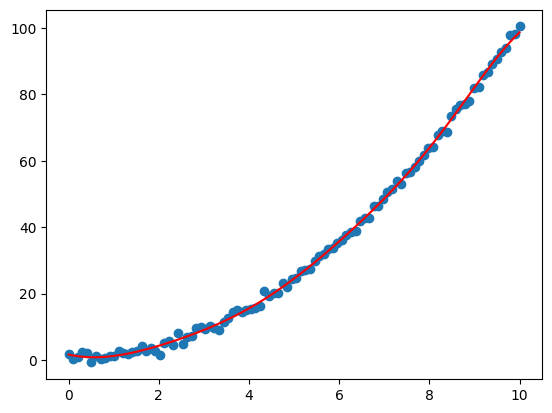

In [98]:
plt.plot(X,prediction,c='r')
plt.scatter(X,y)

RESOUDRE DES PROBLEMES DE CLASSIFICATION 

In [99]:
import pandas as pd 
import seaborn as sns

titanic=sns.load_dataset('titanic')
titanic.shape
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [100]:
titanic=titanic[['survived','pclass','sex','age']]
titanic.dropna(axis=0,inplace=True)
titanic['sex'].replace(['male','female'],[0,1],inplace=True)
titanic.head()

C:\Users\qevan\AppData\Local\Temp\ipykernel_17040\3299924775.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['sex'].replace(['male','female'],[0,1],inplace=True)
C:\Users\qevan\AppData\Local\Temp\ipykernel_17040\3299924775.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic['sex'

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [101]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier()
#on doit alors diviser le tableau en deux : un y (survived) et un X (les autres variables)
y=titanic['survived']
X=titanic.drop('survived',axis=1)

In [102]:
model.fit(X,y)
model.score(X,y)

0.8417366946778712

Ecrivons une fonction pour savoir si une personne aurait survécu.

In [103]:
def survie(model,pclass=3,age=25,sex=0):
    x=np.array([pclass,sex,age]).reshape(1,3) #rentrer les données dans le même ordre que l'entrainement de la machine
    print(model.predict(x))
    print(model.predict_proba(x))
survie(model)


[0]
[[0.6 0.4]]


C:\Users\qevan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\qevan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8739495798319328


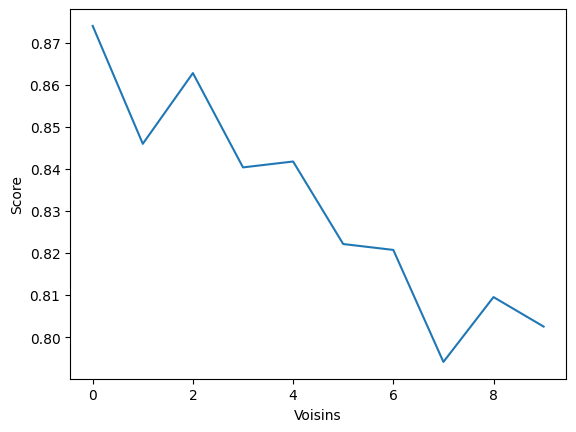

In [104]:
from sklearn.neighbors import KNeighborsClassifier
a=[]
for i in range(1,11):
    model=KNeighborsClassifier(n_neighbors=i)
    #on doit alors diviser le tableau en deux : un y (survived) et un X (les autres variables)
    y=titanic['survived']
    X=titanic.drop('survived',axis=1)
    model.fit(X,y)
    a.append(model.score(X,y))
print(max(a))
plt.xlabel('Voisins')
plt.ylabel('Score')
plt.plot(a)

Il ne faut jamais valider un modèle sur les données qui ont servies à son entrainement !

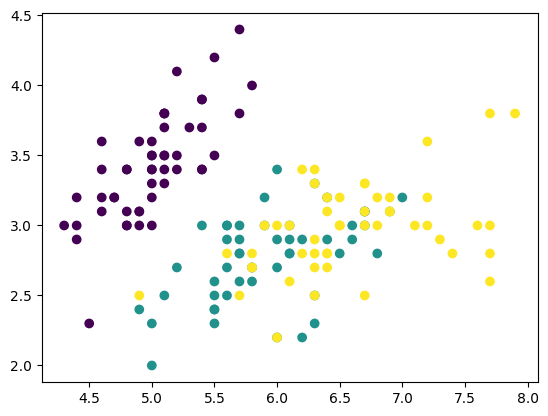

In [105]:
from sklearn.datasets import load_iris
iris=load_iris()
X=iris.data
y=iris.target
plt.scatter(X[:,0],X[:,1],c=y)

Découpage du jeu de données 

Text(0.5, 1.0, 'Set de test')

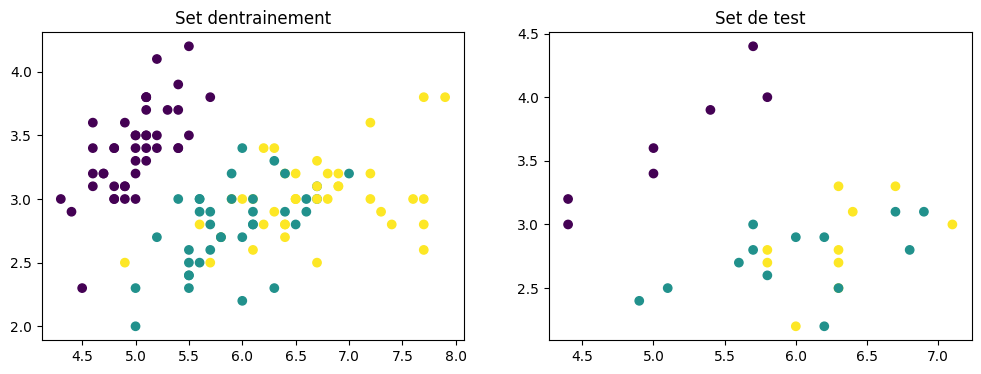

In [106]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.title('Set d''entrainement')
plt.subplot(1,2,2)
plt.scatter(X_test[:,0],X_test[:,1],c=y_test)
plt.title('Set de test')

Entrainement du modèle

In [107]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
model.score(X_train,y_train)


0.975

Test du modèle

In [108]:
model.score(X_test,y_test)

1.0

Validation croisée

In [109]:
from sklearn.model_selection import cross_val_score
cross_val_score(KNeighborsClassifier(),X_train,y_train,cv=5,scoring='accuracy')

array([0.83333333, 0.95833333, 1.        , 0.95833333, 0.95833333])

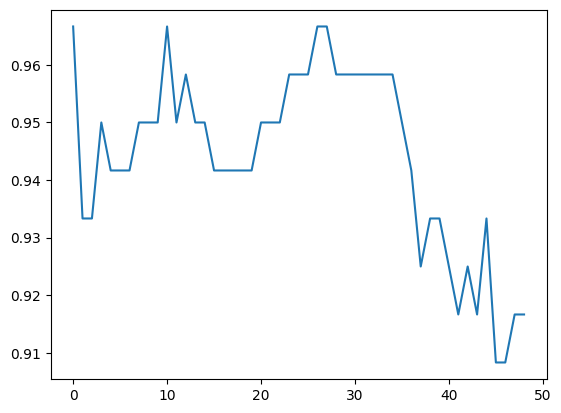

In [110]:
val=[]
for i in range(1,50):
    score=cross_val_score(KNeighborsClassifier(i),X_train,y_train,cv=5,scoring='accuracy').mean()
    val.append(score)
plt.plot(val)

Optimisation de la validation croisée 

In [117]:
from sklearn.model_selection import GridSearchCV
param_grid={'n_neighbors':np.arange(1,20),
            'metric':['euclidiean','manhattan']}
grid=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)
grid.fit(X_train,y_train)
grid.best_score_

C:\Users\qevan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
95 fits failed out of a total of 190.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
95 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\qevan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\qevan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-pac

np.float64(0.9666666666666668)

In [118]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': np.int64(12)}

In [119]:
model=grid.best_estimator_ #pour sauvegarder le meilleur modèle 
model.score(X_test,y_test)

0.9666666666666667

Matrice de confusion 

In [120]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,model.predict(X_test))

array([[ 7,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  9]])

Courbe d'apprentissage 

In [124]:
from sklearn.model_selection import learning_curve
N,train_score,val_score =learning_curve(model,X_train,y_train, train_sizes=np.linspace(0.2,1,5),cv=5)
print(N)

[19 38 57 76 96]


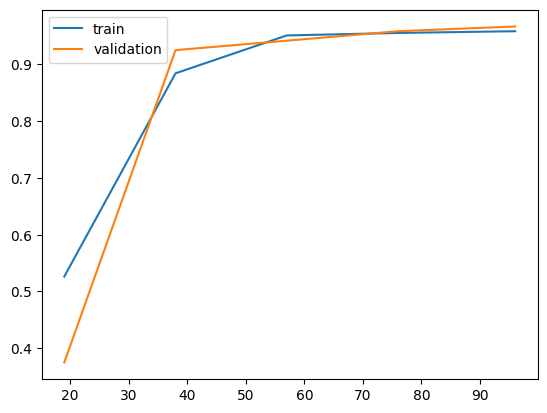

In [129]:
plt.plot(N,train_score.mean(axis=1),label='train')
plt.plot(N,val_score.mean(axis=1),label='validation')
plt.legend()